In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2 as cv
from datetime import datetime 
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

In [21]:
data= datasets.load_diabetes() # 导入数据集
X = data.data # 获得其特征向量
y = data.target # 获得样本label
print("【DESCR】", data.DESCR)
print("feature_names:", data.feature_names)

【DESCR】 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = StandardScaler()
std_X=ss.fit_transform(data.data)
print(std_X)
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(std_X) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(std_X) #通过接口导出结果
X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.5)
print(X_train.shape)

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41853093
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43658851
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06015558
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98564884
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93616291
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08875225
   0.06442552]]
(221, 10)


(221, 10)
(221, 1)
(10, 1)
i：0, Train Loss：14145.794566
i：0, Test Loss：13325.453385
i：10000, Train Loss：1385.577188
i：10000, Test Loss：4629.142130
i：20000, Train Loss：1374.545090
i：20000, Test Loss：4610.585703
i：30000, Train Loss：1367.152693
i：30000, Test Loss：4598.932425
i：40000, Train Loss：1362.088796
i：40000, Test Loss：4592.440680
i：50000, Train Loss：1358.604967
i：50000, Test Loss：4588.674031
i：60000, Train Loss：1356.205597
i：60000, Test Loss：4586.411127
i：70000, Train Loss：1354.552668
i：70000, Test Loss：4585.022809
i：80000, Train Loss：1353.413887
i：80000, Test Loss：4584.164664
i：90000, Train Loss：1352.629313
i：90000, Test Loss：4583.637133
i：100000, Train Loss：1352.088772
i：100000, Test Loss：4583.319129
0:00:07.078459


Text(0.5, 1.0, 'Loss variation in first 10000 steps')

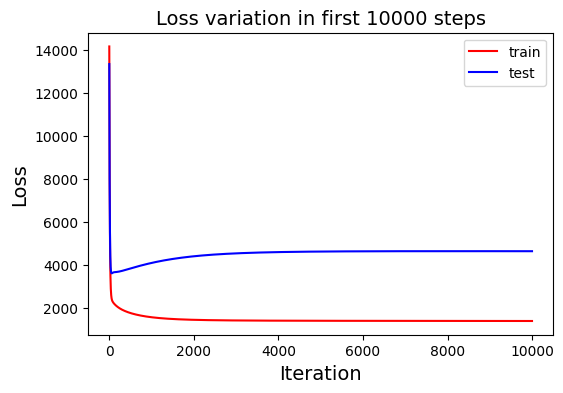

In [23]:
y_train=y_train.reshape(221,1)
print(X_train.shape)
print(y_train.shape)

learn_rate=0.0001
iteration=100000
display_step=10000
#np.random.seed(612)
W=np.random.randn(10,1)
print(W.shape)
mse=[]
mse1=[]
a=datetime.now()
for i in range(0,iteration+1):
    partial=np.matmul(np.transpose(X_train),np.matmul(X_train,W)-y_train)
    W=W-learn_rate*partial
    Y_PRED=np.matmul(X_train,W)
    y_pred=np.matmul(X_test,W)
    loss=np.mean(np.square(y_train-Y_PRED))/2
    loss1=np.mean(np.square(y_test-y_pred))/2
    mse.append(loss)
    mse1.append(loss1)
    if (i%display_step)==0:
        print("i：%i, Train Loss：%f" % (i, mse[i]))
        print("i：%i, Test Loss：%f" % (i, mse1[i]))
b=datetime.now()
print(b-a)
plt.figure(dpi=100)
plt.plot(range(0,10000),mse[0:10000],color='red',label='train')
plt.plot(range(0,10000),mse1[0:10000],color='blue',label='test')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(loc="upper right")
plt.title('Loss variation in first 10000 steps', fontsize=14)

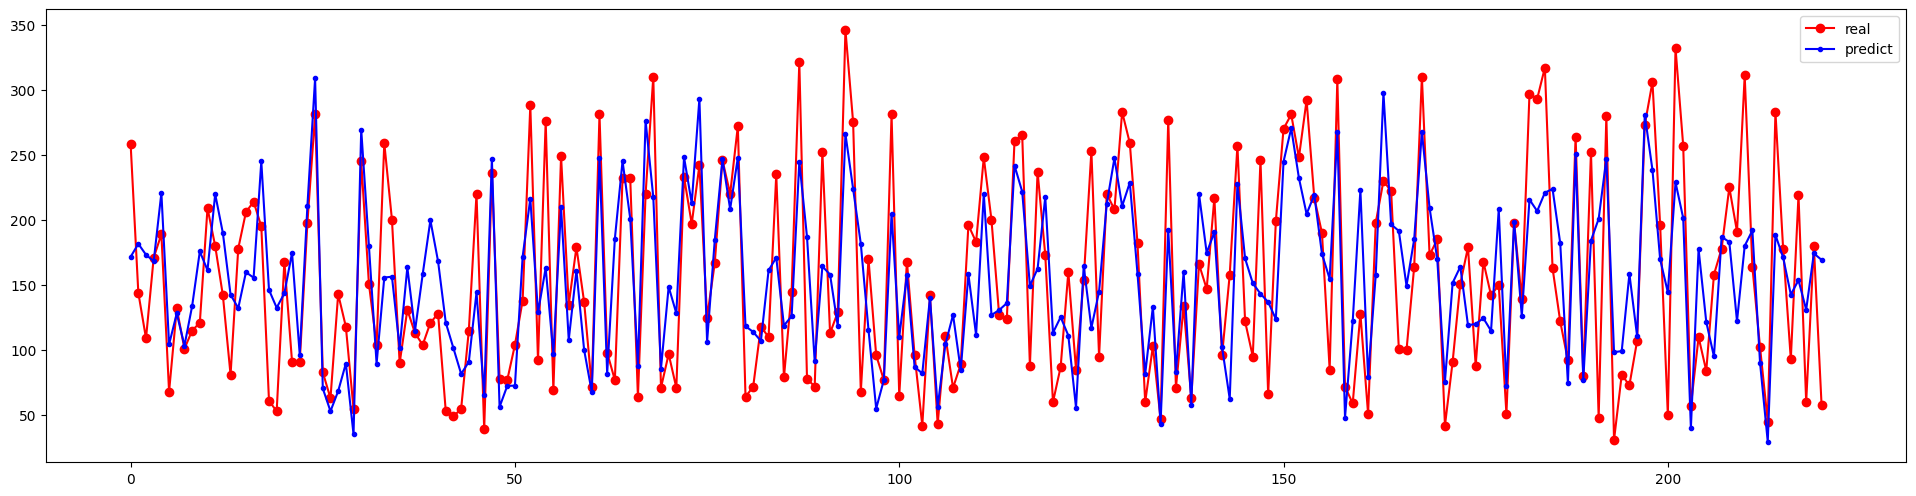

In [6]:
plt.figure(dpi=100,figsize=(24,6))
Y_PRED=Y_PRED.reshape(-1,1)
plt.plot(y_train,color='red',marker='o',label='real')
plt.plot(Y_PRED,color='blue',marker='.',label='predict')
plt.legend(loc="upper right")
plt.show()

i：0, Train Loss：10087.299815
i：0, Test Loss：11609.388349
i：2000, Train Loss：2113.313726
i：2000, Test Loss：3709.746403
i：4000, Train Loss：2603.084396
i：4000, Test Loss：3758.906682
i：6000, Train Loss：2073.434824
i：6000, Test Loss：3820.265759
i：8000, Train Loss：2058.896752
i：8000, Test Loss：3957.846321
i：10000, Train Loss：2478.758630
i：10000, Test Loss：3690.592768
i：12000, Train Loss：1956.601692
i：12000, Test Loss：3735.759921
i：14000, Train Loss：2080.372360
i：14000, Test Loss：3727.083849
i：16000, Train Loss：1823.721052
i：16000, Test Loss：3921.803733
i：18000, Train Loss：2112.367816
i：18000, Test Loss：3638.564041
i：20000, Train Loss：2606.013334
i：20000, Test Loss：3644.522578
0:00:05.221231


Text(0.5, 1.0, 'Loss variation in first 10000 steps')

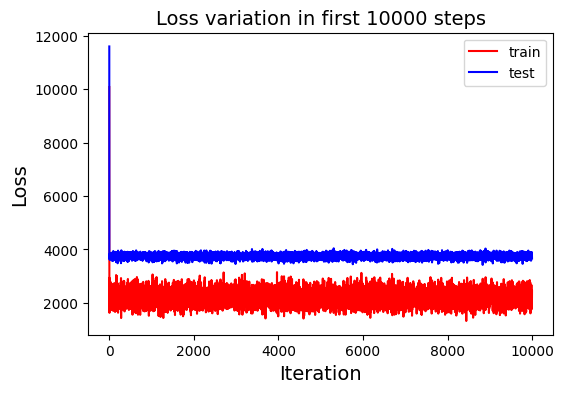

In [25]:
data= datasets.load_diabetes() # 导入数据集
X = data.data # 获得其特征向量
y = data.target # 获得样本label
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = StandardScaler()
std_X=ss.fit_transform(X)
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(std_X) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(std_X) #通过接口导出结果

learn_rate=0.01
iteration=20000
display_step=2000
W=np.random.randn(10,1)
mse=[]
mse1=[]
dl_dt=[]
delta=0
a=datetime.now()
for i in range(0,iteration+1):
    X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.8)
    y_train=y_train.reshape(88,1)
    partial=np.matmul(np.transpose(X_train),np.matmul(X_train,W)-y_train)
    learn_rate=learn_rate/math.sqrt(i+1)
    W=W-learn_rate*partial
    Y_PRED=np.matmul(X_train,W)
    y_pred=np.matmul(X_test,W)
    loss=np.mean(np.square(y_train-Y_PRED))/2
    loss1=np.mean(np.square(y_test-y_pred))/2
    mse.append(loss)
    mse1.append(loss1)
    if (i%display_step)==0:
        print("i：%i, Train Loss：%f" % (i, mse[i]))
        print("i：%i, Test Loss：%f" % (i, mse1[i]))
b=datetime.now()
print(b-a)
plt.figure(dpi=100)
plt.plot(range(0,10000),mse[0:10000],color='red',label='train')
plt.plot(range(0,10000),mse1[0:10000],color='blue',label='test')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(loc="upper right")
plt.title('Loss variation in first 10000 steps', fontsize=14)

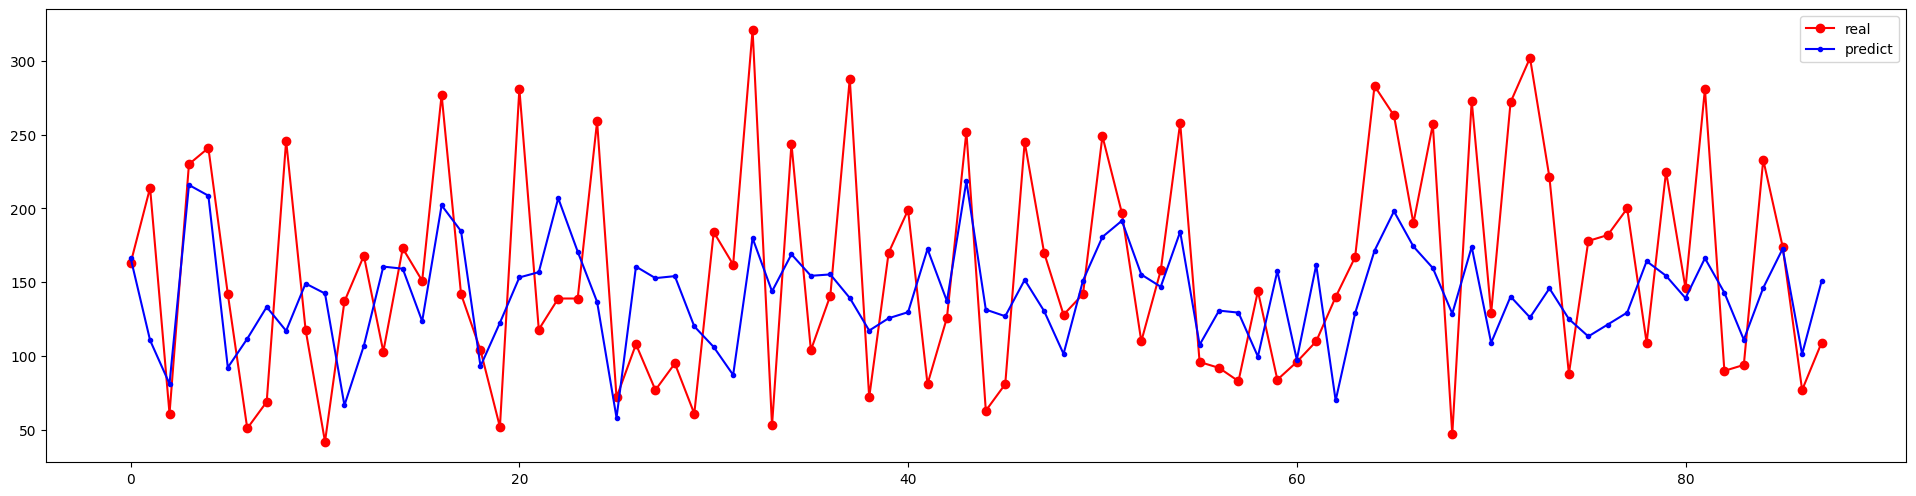

In [33]:
plt.figure(dpi=100,figsize=(24,6))
Y_PRED=Y_PRED.reshape(-1,1)
plt.plot(y_train,color='red',marker='o',label='real')
plt.plot(Y_PRED,color='blue',marker='.',label='predict')
plt.legend(loc="upper right")
plt.show()

i：0, Train Loss：16563.767743
i：0, Test Loss：14088.430833
i：20000, Train Loss：6523.995322
i：20000, Test Loss：6077.723460
i：40000, Train Loss：3173.743088
i：40000, Test Loss：3845.355550
i：60000, Train Loss：2371.764175
i：60000, Test Loss：3584.759653
i：80000, Train Loss：2194.963891
i：80000, Test Loss：3652.208131
i：100000, Train Loss：2121.030055
i：100000, Test Loss：3696.812396
i：120000, Train Loss：2063.073428
i：120000, Test Loss：3713.065841
i：140000, Train Loss：2011.694298
i：140000, Test Loss：3722.509022
i：160000, Train Loss：1966.014081
i：160000, Test Loss：3733.766054
i：180000, Train Loss：1925.540135
i：180000, Test Loss：3748.602198
i：200000, Train Loss：1889.660679
i：200000, Test Loss：3766.694562
0:00:33.482068


Text(0.5, 1.0, 'Loss variation in first 100000 steps')

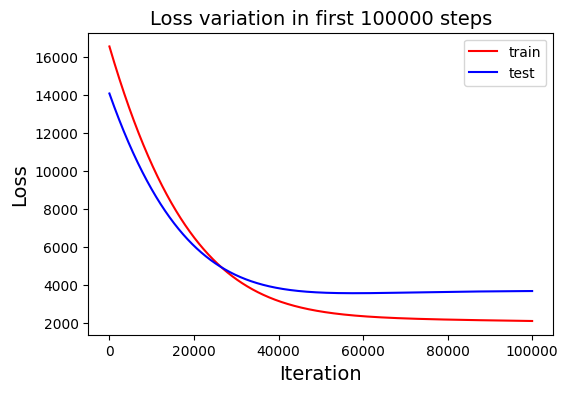

In [26]:
data= datasets.load_diabetes() # 导入数据集
X = data.data # 获得其特征向量
y = data.target # 获得样本label
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = StandardScaler()
std_X=ss.fit_transform(X)
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(std_X) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(std_X) #通过接口导出结果
X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.8)
y_train=y_train.reshape(88,1)

learn_rate=0.001
iteration=200000
display_step=20000
W=np.random.randn(10,1)
mse=[]
dl_dt=[]
delta=0
sigma=0
dl_dt=0
mse1=[]
a=datetime.now()
for i in range(0,iteration+1):
    partial=np.matmul(np.transpose(X_train),np.matmul(X_train,W)-y_train)
    dl_dt+=np.square(partial)
    sigma=np.sqrt(dl_dt/(i+1))
    W=W-learn_rate*partial/sigma
    Y_PRED=np.matmul(X_train,W)
    y_pred=np.matmul(X_test,W)
    loss=np.mean(np.square(y_train-Y_PRED))/2
    loss1=np.mean(np.square(y_test-y_pred))/2
    mse.append(loss)
    mse1.append(loss1)
    if (i%display_step)==0:
        print("i：%i, Train Loss：%f" % (i, mse[i]))
        print("i：%i, Test Loss：%f" % (i, mse1[i]))
b=datetime.now()
print(b-a)
plt.figure(dpi=100)
plt.plot(range(0,100000),mse[0:100000],color='red',label='train')
plt.plot(range(0,100000),mse1[0:100000],color='blue',label='test')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(loc="upper right")
plt.title('Loss variation in first 100000 steps', fontsize=14)

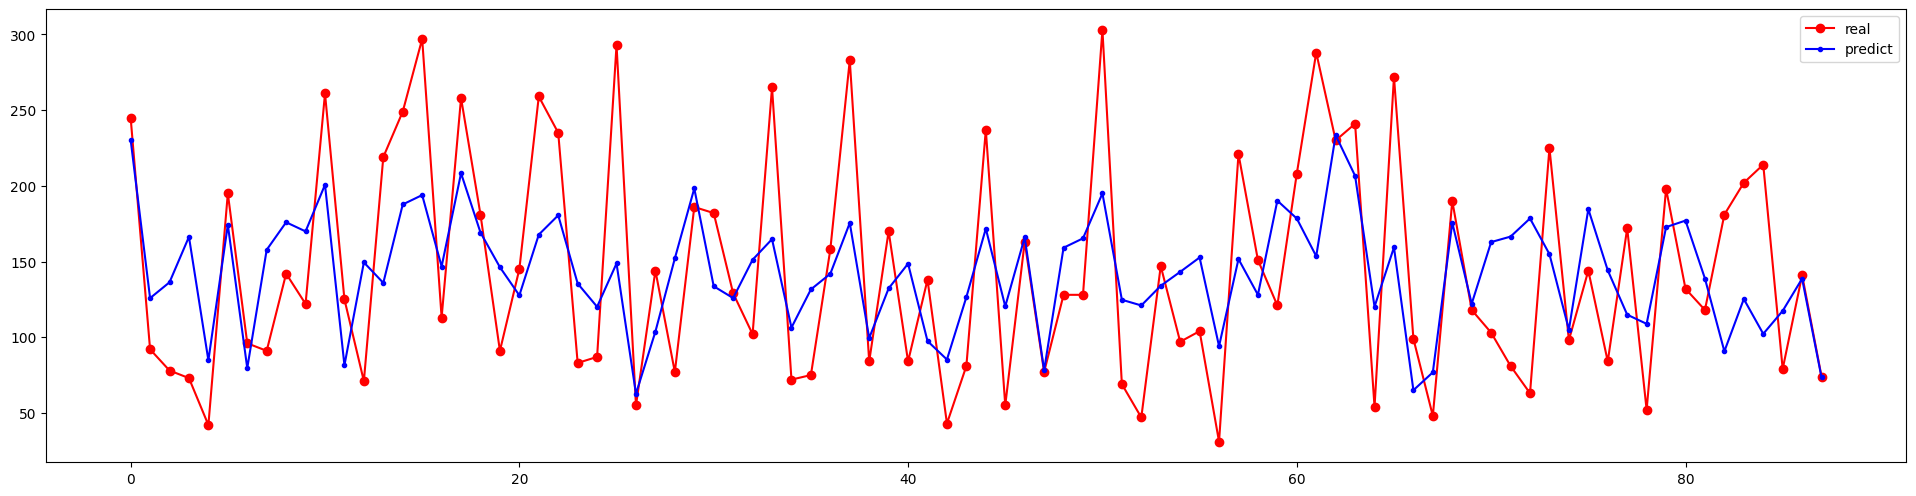

In [47]:
plt.figure(dpi=100,figsize=(24,6))
Y_PRED=Y_PRED.reshape(-1,1)
plt.plot(y_train,color='red',marker='o',label='real')
plt.plot(Y_PRED,color='blue',marker='.',label='predict')
plt.legend(loc="upper right")
plt.show()

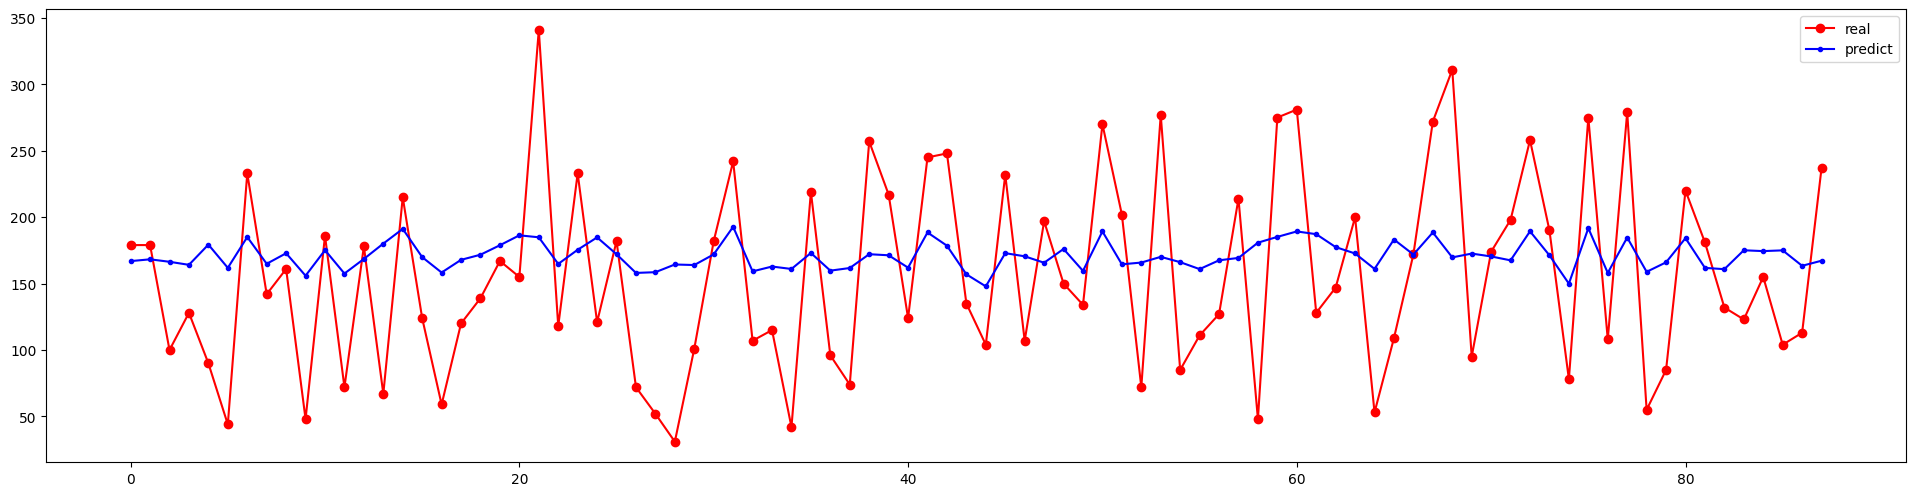

In [31]:
data= datasets.load_diabetes() # 导入数据集
X = data.data # 获得其特征向量
y = data.target # 获得样本label
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
ss = StandardScaler()
std_X=ss.fit_transform(X)
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(std_X) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(std_X) #通过接口导出结果

X_train, X_test, y_train, y_test = train_test_split(result, y, test_size=0.8)
y_train=y_train.reshape(88,1)
model=SGDRegressor()
model.fit(std_X, y.ravel())
y_result = model.predict(X_train)

plt.figure(dpi=100,figsize=(24,6))
plt.plot(y_train,color='red',marker='o',label='real')
plt.plot(y_result,color='blue',marker='.',label='predict')
plt.legend(loc="upper right")
plt.show()